In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from de import initialize_generation, mutation, crossover, likelihood, selection, diver

In [2]:
X = initialize_generation(2, [(0, 100), (0, 100)])


[INFO]: initialized first generation with 20 unique base vectors of dimension 2


In [3]:
V = mutation(X, 0.8)



[INFO]: created array of donor vectors with shape (20, 2)


In [4]:
U = crossover(X, V, 0.8)


[INFO]: created array of trial vectors with shape (20, 2)


In [5]:
L = [likelihood(U[i], [10,10]) for i in range(len(U))]


In [6]:
new_X = selection(X, U, [10, 10])


[INFO]: created a new generation of shape (20, 2) according to the selection process


In [7]:
def gaussian(x:np.array, mu:float, sigma:float) -> np.array:
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)

In [8]:
x_gauss = np.linspace(0, 100, 1000)
y_gauss = gaussian(x_gauss, 10, 10)

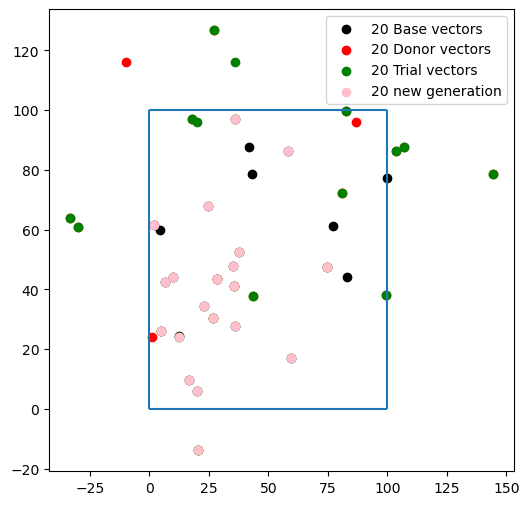

In [9]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(X.T[0], X.T[1], color='black', label=f"{len(X)} Base vectors")
ax.scatter(V.T[0], V.T[1], color='red', label=f"{len(V)} Donor vectors")
ax.scatter(U.T[0], U.T[1], color='green', label=f"{len(U)} Trial vectors")
ax.scatter(new_X.T[0], new_X.T[1], color='pink', label=f"{len(new_X)} new generation")

ax.vlines((0, 100), ymin=0, ymax=100)
ax.hlines((0, 100), xmin=0, xmax=100)
            
ax.legend()

In [10]:
Like_x = [likelihood(X[i][0], [10,10]) for i in range(len(X))]
Like_y = [likelihood(X[i][1], [10,10]) for i in range(len(X))]

Like_x_new = [likelihood(new_X[i][0], [10,10]) for i in range(len(new_X))]
Like_y_new = [likelihood(new_X[i][1], [10,10]) for i in range(len(new_X))]



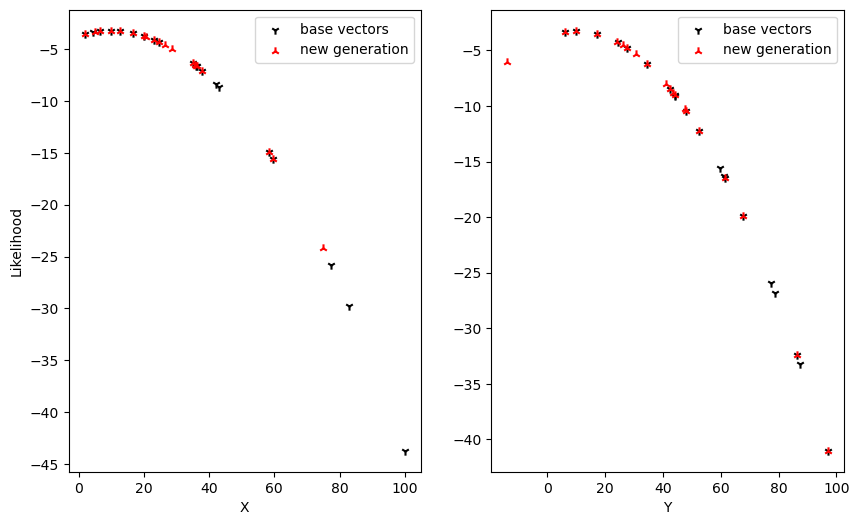

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,6))

ax1.set_xlabel("X")
ax2.set_xlabel("Y")
ax1.set_ylabel("Likelihood")

ax1.scatter(X.T[0], Like_x, c='black', marker="1", label="base vectors")
ax1.scatter(new_X.T[0], Like_x_new, c='red', marker="2", label="new generation")

ax2.scatter(X.T[1], Like_y, c='black', marker="1", label="base vectors")
ax2.scatter(new_X.T[1], Like_y_new, c='red', marker="2", label="new generation")

ax1.legend()
ax2.legend()


In [12]:
generations = diver(2, [(0, 100), (0, 100)], 0.8, 0.8, [50,10], steps=10)

[INFO]: initialized first generation with 20 unique base vectors of dimension 2
[STEP 1] running differential evolution
[INFO]: created array of donor vectors with shape (20, 2)
[INFO]: created array of trial vectors with shape (20, 2)
[INFO]: created a new generation of shape (20, 2) according to the selection process
[INFO]: likelihood difference: 13.1881267236636
[STEP 2] running differential evolution
[INFO]: created array of donor vectors with shape (20, 2)
[INFO]: created array of trial vectors with shape (20, 2)
[INFO]: created a new generation of shape (20, 2) according to the selection process
[INFO]: likelihood difference: 11.913690208598013
[STEP 3] running differential evolution
[INFO]: created array of donor vectors with shape (20, 2)
[INFO]: created array of trial vectors with shape (20, 2)
[INFO]: created a new generation of shape (20, 2) according to the selection process
[INFO]: likelihood difference: 16.364872809703037
[STEP 4] running differential evolution
[INFO]: c

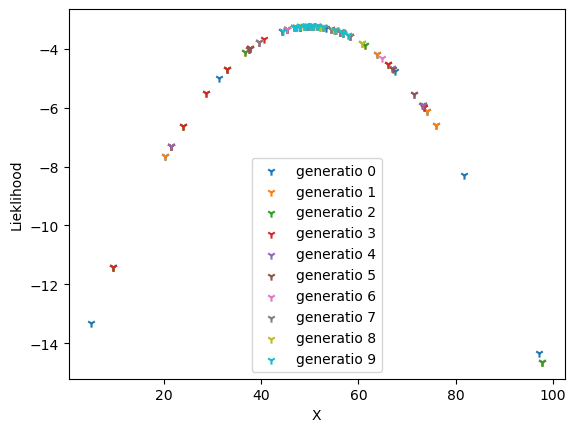

In [14]:

for i in range(10):
    Like = [likelihood(generations[i][j][0], [50,10]) for j in range(len(generations[i]))]
    plt.scatter(generations[i].T[0], Like, marker="1", label=f"generation {i}")

plt.xlabel("X")
plt.ylabel("Lieklihood")
plt.legend()
plt.show()